In [1]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [2]:
data = pd.read_csv('archive/movies_metadata.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_19148\3501046477.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('archive/movies_metadata.csv')


In [3]:
data.shape

(45466, 24)

In [8]:
new_data = data.iloc[:, -2:].dropna()


In [5]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5)
kmeans.fit(new_data)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [10]:
kmeans.cluster_centers_

array([[5.55795367e+00, 2.89689334e+01],
       [7.20820513e+00, 4.53278974e+03],
       [6.67688266e+00, 2.07748511e+03],
       [6.46146838e+00, 6.84835477e+02],
       [7.44489796e+00, 8.33938776e+03]])

In [11]:
kmeans.labels_

array([1, 2, 0, ..., 0, 0, 0], shape=(45460,), dtype=int32)

In [12]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{np.int32(0): np.int64(42784), np.int32(1): np.int64(194), np.int32(2): np.int64(569), np.int32(3): np.int64(1864), np.int32(4): np.int64(49)}


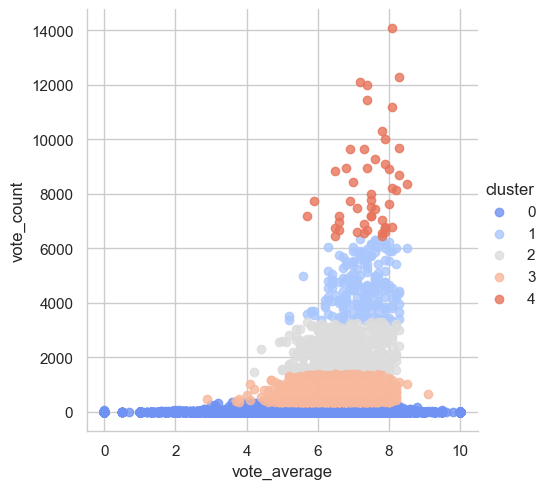

In [14]:
new_data['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='vote_average', y='vote_count', data=new_data, hue='cluster', palette='coolwarm',aspect=1, fit_reg=False)